## Copyright Note


## Deep Learning Reference

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Deep Learning with Python by Francois Chollet (2018)** [relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

**Other examples are adapted from wiki and internet resources**

**The materials flow and content copyright to Samir Abdelrahman**




# Neural Network-- weights

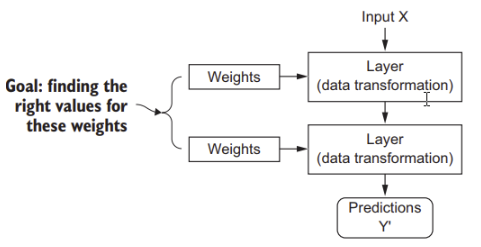


# Neural Network-- Loss function

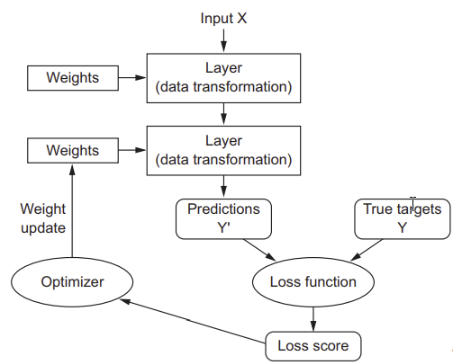

# Neural Network-- Adjust weights

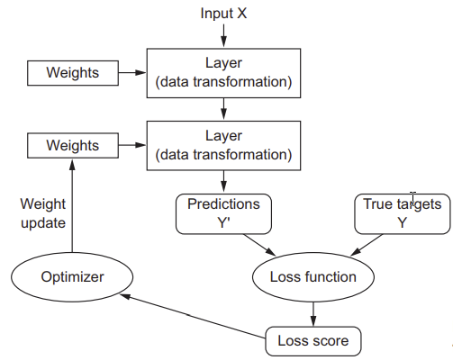

# Keras, TensorFlow, Theano, and CNTK

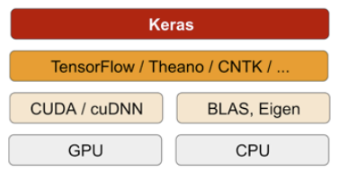

**Google web search interest** for different deep-learning frameworks over time

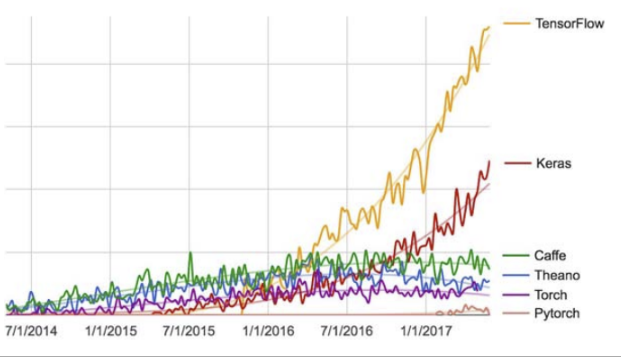

What are the tensors?
*Tensor is as simple as it is a value container. *

In [ ]:
# tensor with 0-dim = scalor
import numpy as np
x=np.array(12)
print(x)
print(x.ndim)

In [ ]:
# Vextor: 1-dim tensor
x=np.array([12,3,6,14])
print(x)
print(x.ndim)

In [ ]:
# Matrix: 2-dim tensor
x=np.array([[12,3,6,14],
            [1,2,4,5]])
print(x)
print(x.ndim)

In [ ]:
x.shape

In [ ]:
# 3-dim tensor
x=np.array([[[12,3,6,14],
            [1,2,4,5]],
            [[12,3,6,14],
            [1,2,4,5]]
           ])
print(x)
print(x.ndim)

In [ ]:
x.shape

# Fully-connected Neural Network

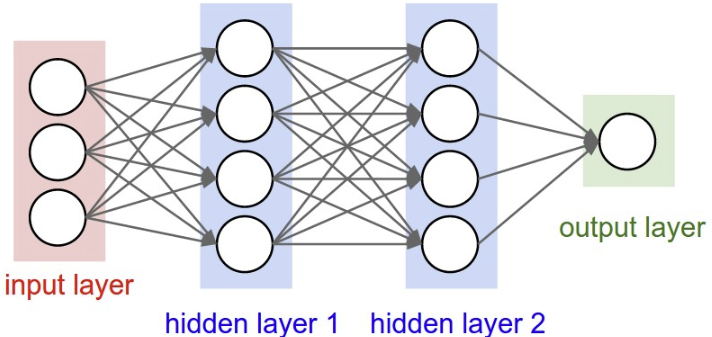

# MNIST Dataset(https://keras.io/datasets/)

## Multi-class problem

Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


**Remember deep learning is not itself a classifier rather it is a feature learning approach. As such, you can use it to learn representation and you need to end up with a layer of classification (binary or mutli-class) or regression.  It is a feature representation to do a task**

**In spite of the fact it is a high-performing learning approach, but you need to use the best hyper-parameter combination to minimize the computational resourse you have**

In [ ]:
#The Mnist database (http://yann.lecun.com/exdb/mnist/)

import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Step 1: Load the data
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

#Step 2: See the data distribution
print(len(train_labels))
print(train_labels)
print(train_images.shape)
print(len(test_labels))
print(test_labels)
print(test_images.shape)

In [ ]:
#Step 3: Prpare the tensors and normalize and have them float
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [ ]:
#Step 4: Encode the categories

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [ ]:
print(len(train_labels),train_labels)

In [ ]:
print(len(test_labels),test_labels)

## Activation Functions and Loss Functions in Last Layers

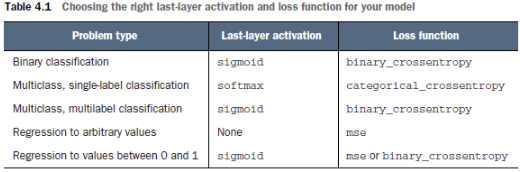

[Activation Function in Keras](https://keras.io/activations/)

In [ ]:
#Build the model
from tensorflow.keras import models
from tensorflow.keras import layers
network =models.Sequential()
network.add(layers.Dense(1024,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(512,activation='sigmoid'))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])



## Question (Interpret the above model with the summary)?

In [ ]:
network.summary()

In [ ]:
network.fit(train_images,train_labels,epochs=5,batch_size=100)

In [ ]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test_acc',test_acc)

#Overfitting?